<a href="https://colab.research.google.com/github/evrimakgul/Deep_Learning/blob/master/Reuters_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reuters Assingment
## Adapted from Deep Learning with Python by Francois Chollet
#### Using the IMDB jupyter notebook as an example follow the prompts below to build a neural network to classify Reuters news wires into 46 different categories.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Select TensorFlow 2.X, numpy, pandas, and the dataset
%tensorflow_version 2.x
from tensorflow.keras import backend
from tensorflow.keras.datasets import reuters
import numpy as np
import pandas as pd
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

TensorFlow 2.x selected.
2113536/2110848 [==============================] - 0s 0us/step


In [3]:
# Print the word index
wi = reuters.get_word_index()
print(tuple(wi.items())[0:9]) # the first 9 elements of the *wi* dictionary
print(len(wi)) # number of words in the *wi* dictionary: 30979

557056/550378 [==============================] - 0s 0us/step
(('mdbl', 10996), ('fawc', 16260), ('degussa', 12089), ('woods', 8803), ('hanging', 13796), ('localized', 20672), ('sation', 20673), ('chanthaburi', 20675), ('refunding', 10997))
30979


In [4]:
import operator
sorted_by_values = sorted(wi.items(), key=operator.itemgetter(1))
sorted_by_values[:9] # the first 9 words by their usage frequency

[('the', 1),
 ('of', 2),
 ('to', 3),
 ('in', 4),
 ('said', 5),
 ('and', 6),
 ('a', 7),
 ('mln', 8),
 ('3', 9)]

In [0]:
# Here is the same function we created for vectorizing the IMDB data.
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
# Vectorize the train_data and test_data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0], x_test[0], len(x_train[0]), len(x_test[0])

(array([0., 1., 1., ..., 0., 0., 0.]),
 array([0., 1., 1., ..., 0., 0., 0.]),
 10000,
 10000)

In [7]:
# Print the unique train labels (there should be 46)
label_list = []
for i in train_labels:
  if i not in label_list:
    label_list.append(i)
label_list = sorted(label_list)
print("label list:", label_list, "\nThere are", len(label_list), "unique labels in train_label list.")

# Print the shape of x_train
print("\nx_train shape:", x_train.shape)

label list: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45] 
There are 46 unique labels in train_label list.

x_train shape: (8982, 10000)


In [8]:
# Keras has a built in function for catergoial encoding which we saw in the MNIST workbook
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
# Convert the y targets to float32
# y_train = np.asarray(train_labels).astype('float32')
# y_test = np.asarray(test_labels).astype('float32')

# y_train[0:9], y_test[0:9], len(y_train), len(y_test)
# train_labels[0:9]

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
# Vectorize the labels 

# I did not understand this. our labels are already a vector. 

In [0]:
# Import models and layers from Keras
from tensorflow.keras import models
from tensorflow.keras import layers

In [0]:
# Build a sequential model network with 1 hidden layer. The input and hidden layer must have more hidden units than the number of classification categories.
model = models.Sequential()
model.add(layers.Dense(1472, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(736, activation = 'relu'))
model.add(layers.Dense(368, activation = 'relu'))
model.add(layers.Dense(184, activation = 'relu'))
model.add(layers.Dense(92, activation = 'relu'))
model.add(layers.Dense(46, activation='softmax'))

# Things to think about, input and hidden layer activation, output activation for a multiclass problem, input shape, output units

In [0]:
# Compile the model. Think about what optimizer, loss function, and metrics will you use.
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
from sklearn.model_selection import train_test_split

In [15]:
# Train your model on the training data for 20 epochs and 500 batch size and a validation split = 20%.
x_train, x_valid, train_labels, y_valid = train_test_split(x_train, train_labels, test_size=0.10, shuffle= True)
history = model.fit(x_train, train_labels, epochs=4, batch_size=500, validation_data = (x_valid, y_valid))

Train on 8083 samples, validate on 899 samples
Epoch 1/4
8083/8083 [==============================] - 3s 321us/sample - loss: 2.2103 - accuracy: 0.5043 - val_loss: 1.4928 - val_accuracy: 0.6908
Epoch 2/4
8083/8083 [==============================] - 1s 75us/sample - loss: 1.1893 - accuracy: 0.7223 - val_loss: 1.2332 - val_accuracy: 0.7175
Epoch 3/4
8083/8083 [==============================] - 1s 69us/sample - loss: 0.7798 - accuracy: 0.8029 - val_loss: 1.1159 - val_accuracy: 0.7642
Epoch 4/4
8083/8083 [==============================] - 1s 73us/sample - loss: 0.4819 - accuracy: 0.8757 - val_loss: 1.1609 - val_accuracy: 0.7809


In [16]:
# Evaluate the model on the test data and print the results
results = model.evaluate(x_test, test_labels)
print(results)

2246/2246 [==============================] - 0s 128us/sample - loss: 1.2640 - accuracy: 0.7578
[1.2640330485754105, 0.75779164]


In [17]:
# Use this bit of code to view the History output.
hist = pd.DataFrame(history.history)
print(hist.tail())

       loss  accuracy  val_loss  val_accuracy
0  2.210251  0.504268  1.492842      0.690768
1  1.189282  0.722257  1.233201      0.717464
2  0.779824  0.802920  1.115917      0.764182
3  0.481936  0.875665  1.160948      0.780868


In [0]:
import matplotlib.pyplot as plt

In [0]:
# Let's plot the loss and accuracy vs epochs
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

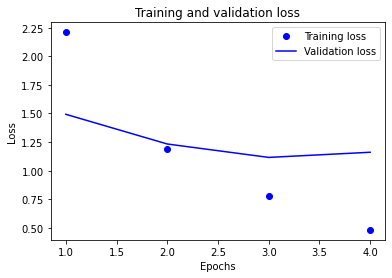

In [20]:
# Use the IMDB example to plot the validataion and training loss vs epocs
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

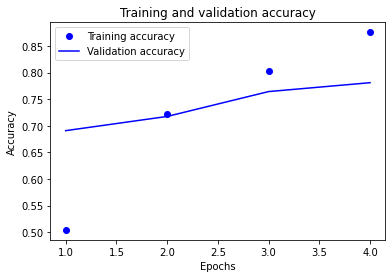

In [21]:
# Use the IMDB example to plot the validataion and training accuracy vs epocs
plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
# Clear your session using this command: backend.clear_session() 
# Build a new model and try to get the test accuracy above 80%
# Things to try: more hidden layers and hiddent units, activation types, epochs, batch size, and validation_split.
# Try as many models as you like.  Be sure to clear the session each time.  backend.clear_session() 



In [0]:
backend.clear_session()